In [ ]:
#  Creating aggregate features based on some of the given categorical features

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
plt.rc('xtick', labelsize=20)
plt.rc('axes', titlesize=20) 
plt.rc('axes', labelsize=20) 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Crossroads/Cross Road Analytics Competition Dataset.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,PC1,Price,paid,add_datetime,class_name,status,Sales_Source,isHost,SeatType,TicketClass,Start Year,LastYear,Term,TicketType,SeatUniqueID,Season,ClubExpYear,Tenure,UniqueID,isAttended,Resold,ResalePrice,ResaleDate,isSTM
0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,FR,F,111.0,Y,2021-03-31 16:08:52,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-1,2021,NaN,25.0,CLT21HOU-101-10-1,Yes,NaN,NaN,NaN,NaN
1,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,10,FR,F,111.0,Y,2021-03-31 16:08:19,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-10,2021,NaN,20.0,CLT21HOU-101-10-10,No,NaN,NaN,NaN,NaN
2,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,11,FR,F,111.0,Y,2021-03-31 16:08:19,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-11,2021,NaN,20.0,CLT21HOU-101-10-11,No,NaN,NaN,NaN,NaN
3,1489599590,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,12,FR,F,111.0,Y,2021-03-31 16:10:20,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-12,2021,NaN,4.0,CLT21HOU-101-10-12,Yes,NaN,NaN,NaN,NaN
4,115101990,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,13,FR,F,111.0,Y,2021-03-31 16:08:21,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-13,2021,NaN,32.0,CLT21HOU-101-10-13,No,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(1286916, 34)

# Account Type

In [ ]:
acct_type_groups = pd.read_csv("/content/drive/MyDrive/Crossroads/Feature Stats/Account Type Group - Account Type Group.csv")
acct_type_groups = acct_type_groups.rename({"Group": "acct_type_group"}, axis=1)
acct_type_groups.head()

,acct_type_desc,No,Yes,count,%Attended,acct_type_group,Unnamed: 6
0,Season,96300,532579,628879,84.687038,G1,"Good count, good attendance"
1,Club,23487,110694,134181,82.496031,G2,NaN
2,House,17085,95323,112408,84.800904,G3,NaN
3,Personal,10122,61836,71958,85.933461,G4,NaN
4,Sponsor,12115,32991,45106,73.141046,G2,"Good count, decent attendance"


In [ ]:
acct_type_groups[acct_type_groups['acct_type_group']=='G6'].head(100)

,acct_type_desc,No,Yes,count,%Attended,acct_type_group,Unnamed: 6
25,NONRENEWAL,2,13,15,86.666667,G6,V.Low count but V.good attendance
26,Hold Account,0,8,8,100.000000,G6,NaN
27,Window Account,0,8,8,100.000000,G6,NaN
28,Hold,0,2,2,100.000000,G6,NaN
29,Premium,0,2,2,100.000000,G6,NaN


In [ ]:
acct_type_groups.groupby('acct_type_group').mean()

,No,Yes,count,%Attended
acct_type_group,,,,
G1,50669.000000,277397.500000,328066.500000,83.100839
G2,14878.666667,53838.666667,68717.333333,74.003227
G3,5664.250000,25635.500000,31299.750000,68.233926
G4,3322.000000,18052.500000,21374.500000,78.872892
G5,89.416667,54.416667,143.833333,39.250781
G6,0.400000,6.600000,7.000000,97.333333


In [ ]:
df = df.merge(acct_type_groups[["acct_type_desc", "acct_type_group"]], on="acct_type_desc", how="left")

In [ ]:
df.tail()

,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,PC1,Price,paid,add_datetime,class_name,status,Sales_Source,isHost,SeatType,TicketClass,Start Year,LastYear,Term,TicketType,SeatUniqueID,Season,ClubExpYear,Tenure,UniqueID,isAttended,Resold,ResalePrice,ResaleDate,isSTM,acct_type_group
1286911,1831131890,Season,CLT22WAS,2022-10-30,22FS,Not Comp,646,9,5,RN,R,48.0,Y,2022-06-27 11:52:01,ACCOUNT MANAGER,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,New,646-9-5,2022,NaN,0.0,CLT22WAS-646-9-5,No,Yes,50.0,2022-09-11 00:00:00,1.0,G1
1286912,1831131890,Season,CLT22WAS,2022-10-30,22FS,Not Comp,646,9,6,RN,R,48.0,Y,2022-06-27 11:52:01,ACCOUNT MANAGER,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,New,646-9-6,2022,NaN,0.0,CLT22WAS-646-9-6,Yes,NaN,NaN,NaN,1.0,G1
1286913,1246180690,Sponsor,CLT22WAS,2022-10-30,22FS8,Not Comp,646,9,7,RR,R,48.0,N,2022-05-31 13:23:12,JIM IRSAY,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Sponsor,646-9-7,2022,NaN,8.0,CLT22WAS-646-9-7,Yes,NaN,NaN,NaN,NaN,G2
1286914,1246180690,Sponsor,CLT22WAS,2022-10-30,22FS8,Not Comp,646,9,8,RR,R,48.0,N,2022-05-31 13:23:12,JIM IRSAY,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Sponsor,646-9-8,2022,NaN,8.0,CLT22WAS-646-9-8,Yes,NaN,NaN,NaN,NaN,G2
1286915,1246180690,Sponsor,CLT22WAS,2022-10-30,22FS8,Not Comp,646,9,9,RR,R,48.0,N,2022-05-31 13:23:12,JIM IRSAY,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Sponsor,646-9-9,2022,NaN,8.0,CLT22WAS-646-9-9,Yes,NaN,NaN,NaN,NaN,G2


# Plan Event Name

In [ ]:
plan_event_group = pd.read_csv("/content/drive/MyDrive/Crossroads/Feature Stats/Plan Event Names - Plan Event Names - Plan Event Names - Plan Event Names.csv")
plan_event_group = plan_event_group.rename({"Group": "plan_event_name_group"}, axis=1)
plan_event_group

,plan_event_name,No,Yes,count,%Attended,plan_event_name_group
0,21FS,72665,357727,430392,83.116554,G1
1,21FS9,358,1398,1756,79.612756,G2
2,22FS,74589,379379,453968,83.569547,G1
3,22FS8,1595,17466,19061,91.632128,G2
4,22FS9,7,25,32,78.125000,G3
5,22MPACK,85,765,850,90.000000,G3
6,22MPACK2,0,6,6,100.000000,G3


In [ ]:
df = df.merge(plan_event_group[["plan_event_name", "plan_event_name_group"]], on="plan_event_name", how="left")

# Row Name

In [ ]:
row_name_group = pd.read_csv("/content/drive/MyDrive/Crossroads/Feature Stats/Row Names - Row Names.csv")
row_name_group = row_name_group.rename({"Group": "row_name_group"}, axis=1)
row_name_group.head()

,row_name,No,Yes,count,%Attended,row_name_group
0,2,11782,60254,72036,83.644289,G1
1,1,10329,57405,67734,84.750642,G1
2,5,10547,50725,61272,82.786591,G1
3,9,11914,48368,60282,80.236223,G1
4,10,12232,45764,57996,78.908890,G1


In [ ]:
df = df.merge(row_name_group[["row_name", "row_name_group"]], on="row_name", how="left")

# Seat Nums

In [ ]:
seat_nums_grp = pd.read_csv("/content/drive/MyDrive/Crossroads/Feature Stats/Seat Nums - Seat Nums.csv")
seat_nums_grp = seat_nums_grp.rename({"Group": "seat_nums_group"}, axis=1)
seat_nums_grp.head()

,SeatNum,No,Yes,count,%Attended,seat_nums_group
0,8,11873,43819,55692,78.680960,G1
1,9,11856,43242,55098,78.481978,G1
2,2,10973,43891,54864,79.999635,G1
3,1,10591,44237,54828,80.683228,G1
4,3,11065,43601,54666,79.758899,G1


In [ ]:
df = df.merge(seat_nums_grp[["SeatNum", "seat_nums_group"]], on="SeatNum", how="left")

# Section Names

In [ ]:
section_names_grp = pd.read_csv("/content/drive/MyDrive/Crossroads/Feature Stats/Section Names - Section Names.csv")
section_names_grp = section_names_grp.rename(columns={"Group": "section_names_group"})
section_names_grp.head()

,section_name,No,Yes,count,%Attended,section_names_group,Zone
0,101,3623,10957,14580,75.150892,G1,N
1,102,3613,11183,14796,75.581238,G1,N
2,103,2174,7222,9396,76.862495,G1,N
3,105,1566,10062,11628,86.532508,G1,N
4,108,992,5362,6354,84.387787,G1,E


In [ ]:
section_names_grp["section_name"] = section_names_grp["section_name"].astype(int)

In [ ]:
section_names_grp.groupby(["section_names_group"]).agg({"%Attended": "mean"}).reset_index()

,section_names_group,%Attended
0,G1,81.838905
1,G2,70.573689
2,G3,72.215755


In [ ]:
section_names_grp.groupby(["Zone"]).agg({"%Attended": "mean"}).reset_index()

,Zone,%Attended
0,E,79.360030
1,N,77.853529
2,S,80.253454
3,W,79.916812


In [ ]:
df = df.merge(section_names_grp[["section_name", "section_names_group", "Zone"]], on="section_name", how="left")

In [ ]:
df.head()

,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,PC1,Price,paid,add_datetime,class_name,status,Sales_Source,isHost,SeatType,TicketClass,Start Year,LastYear,Term,TicketType,SeatUniqueID,Season,ClubExpYear,Tenure,UniqueID,isAttended,Resold,ResalePrice,ResaleDate,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone
0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,FR,F,111.0,Y,2021-03-31 16:08:52,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-1,2021,NaN,25.0,CLT21HOU-101-10-1,Yes,NaN,NaN,NaN,NaN,G1,G1,G1,G1,G1,N
1,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,10,FR,F,111.0,Y,2021-03-31 16:08:19,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-10,2021,NaN,20.0,CLT21HOU-101-10-10,No,NaN,NaN,NaN,NaN,G1,G1,G1,G1,G1,N
2,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,11,FR,F,111.0,Y,2021-03-31 16:08:19,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-11,2021,NaN,20.0,CLT21HOU-101-10-11,No,NaN,NaN,NaN,NaN,G1,G1,G1,G1,G1,N
3,1489599590,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,12,FR,F,111.0,Y,2021-03-31 16:10:20,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-12,2021,NaN,4.0,CLT21HOU-101-10-12,Yes,NaN,NaN,NaN,NaN,G1,G1,G1,G1,G1,N
4,115101990,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,13,FR,F,111.0,Y,2021-03-31 16:08:21,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-13,2021,NaN,32.0,CLT21HOU-101-10-13,No,NaN,NaN,NaN,NaN,G1,G1,G1,G1,G1,N


# Comp name

In [ ]:
comp_names_grp = pd.read_csv("/content/drive/MyDrive/Crossroads/Feature Stats/Comp Names - Comp Names.csv")
comp_names_grp = comp_names_grp.rename(columns={"Group": "comp_names_group"})
comp_names_grp.head()

,comp_name,No,Yes,count,%Attended,comp_names_group
0,Not Comp,164131,873027,1037158,84.174928,G1
1,Front Office/Club Staff,2689,7935,10624,74.689383,G1
2,Promotions,3302,3779,7081,53.368168,G2
3,Charity/Community Relations,3773,1889,5662,33.362769,G3
4,Youth Football,1968,1708,3676,46.463547,G4


In [ ]:
df = df.merge(comp_names_grp[["comp_name", "comp_names_group"]], on="comp_name", how="left")

In [ ]:
df.head()

,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,PC1,Price,paid,add_datetime,class_name,status,Sales_Source,isHost,SeatType,TicketClass,Start Year,LastYear,Term,TicketType,SeatUniqueID,Season,ClubExpYear,Tenure,UniqueID,isAttended,Resold,ResalePrice,ResaleDate,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group
0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,FR,F,111.0,Y,2021-03-31 16:08:52,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-1,2021,NaN,25.0,CLT21HOU-101-10-1,Yes,NaN,NaN,NaN,NaN,G1,G1,G1,G1,G1,N,G1
1,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,10,FR,F,111.0,Y,2021-03-31 16:08:19,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-10,2021,NaN,20.0,CLT21HOU-101-10-10,No,NaN,NaN,NaN,NaN,G1,G1,G1,G1,G1,N,G1
2,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,11,FR,F,111.0,Y,2021-03-31 16:08:19,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-11,2021,NaN,20.0,CLT21HOU-101-10-11,No,NaN,NaN,NaN,NaN,G1,G1,G1,G1,G1,N,G1
3,1489599590,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,12,FR,F,111.0,Y,2021-03-31 16:10:20,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-12,2021,NaN,4.0,CLT21HOU-101-10-12,Yes,NaN,NaN,NaN,NaN,G1,G1,G1,G1,G1,N,G1
4,115101990,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,13,FR,F,111.0,Y,2021-03-31 16:08:21,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-13,2021,NaN,32.0,CLT21HOU-101-10-13,No,NaN,NaN,NaN,NaN,G1,G1,G1,G1,G1,N,G1


## Shikhar's Columns: 
### price_code


In [ ]:
def pivot(train_data, group_cols, agg_col):
    data = train_data.groupby([group_cols[0], group_cols[1]]).agg({agg_col: "count"}).reset_index()
    data = pd.pivot_table(data, values=agg_col, index=[group_cols[0]], columns=[group_cols[1]], aggfunc=np.sum).reset_index().rename_axis(None, axis=1)
    data = data.fillna(0)
    data["count"] = data["Yes"] + data["No"]
    data["%Attended"] = 100*data["Yes"]/(data["Yes"]+data["No"])
    return data

def plot_bar(data, x_axis, y_axis, xlabel, ylabel):
    plt.figure(figsize=[30,20])
    plt.bar(data[x_axis], data[y_axis])
    plt.xticks([x for x in range(len(data[x_axis]))], [x for x in data[x_axis].values.tolist()], rotation=90) 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def bins(row, col, min_, max_, width, bins_=[]):
  bins = []
  if len(bins_)==0:
    bins = [[i, i+width] for i in range(min_, max_, width)]
  else:
    for i in range(len(bins_)-1):
      bins.append([bins_[i], bins_[i+1]])
  bin_brac = ""
  for bin in bins:
    if row[col]>=bin[0] and row[col]<=bin[1]:
      bin_brac = f"{bin[0]}-{bin[1]}"
  return bin_brac


In [ ]:
df_price_code=pivot(df,['price_code','isAttended'],'acct_id')

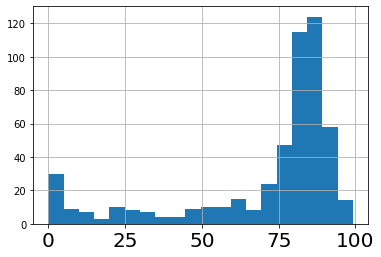

In [ ]:
df_price_code[df_price_code['count']>=100]['%Attended'].hist(bins=20)

Dividing the groups as follows:
1. price_code_group_0: group where count < 100
2. price_code_group_1: very low attendance 0-50%
3. price_code_group_2: low attendance 50%-75%
4. price_code_group_3: low attendance 75%-100%



In [ ]:
price_code_group_0 = list(df_price_code[df_price_code['count']<100]['price_code'].unique())
price_code_group_1 = list(df_price_code[(df_price_code['count']>=100) & (df_price_code['%Attended']<=50)]['price_code'].unique())
price_code_group_2 = list(df_price_code[(df_price_code['count']>=100) & (df_price_code['%Attended']>50) & (df_price_code['%Attended']<=75)]['price_code'].unique())
price_code_group_3 = list(df_price_code[(df_price_code['count']>=100) & (df_price_code['%Attended']>75)]['price_code'].unique())

In [ ]:
df['price_group']=np.nan
df.loc[df['price_code'].isin(price_code_group_0),'price_group']= 'price_group_0'
df.loc[df['price_code'].isin(price_code_group_1),'price_group']= 'price_group_1'
df.loc[df['price_code'].isin(price_code_group_2),'price_group']= 'price_group_2'
df.loc[df['price_code'].isin(price_code_group_3),'price_group']= 'price_group_3'

## PC1

In [ ]:
df_PC1=pivot(df,['PC1','isAttended'],'acct_id')

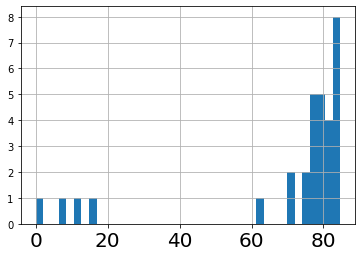

In [ ]:
df_PC1['%Attended'].hist(bins=40)

Dividing the groups as follows:
1. PC1_group_0: group where count < 70
2. PC1_group_1: very low attendance 70-80%
3. PC1_group_2: low attendance 80%-100%


In [ ]:
df_PC1

,PC1,???,No,Yes,count,%Attended
0,5,6430.0,9614.0,48256.0,57870.0,83.386902
1,6,2773.0,4570.0,20387.0,24957.0,81.688504
2,7,1584.0,3050.0,11206.0,14256.0,78.605499
3,8,3165.0,5655.0,22830.0,28485.0,80.147446
4,9,536.0,1041.0,3783.0,4824.0,78.420398
5,A,4520.0,7092.0,33588.0,40680.0,82.566372
6,B,7096.0,10784.0,53080.0,63864.0,83.114117
7,C,3188.0,4402.0,24290.0,28692.0,84.657744
8,D,8006.0,11506.0,60548.0,72054.0,84.031421
9,E,896.0,1308.0,6756.0,8064.0,83.779762


In [ ]:
PC1_group_0 = list(df_PC1[df_PC1['%Attended']<=70]['PC1'].unique())
PC1_group_1 = list(df_PC1[(df_PC1['%Attended']>70) & (df_PC1['%Attended']<=80)]['PC1'].unique())
PC1_group_2 = list(df_PC1[df_PC1['%Attended']>80]['PC1'].unique())

In [ ]:
df['PC1_group']=np.nan
df.loc[df['PC1'].isin(PC1_group_0),'PC1_group']= 'PC1_group_0'
df.loc[df['PC1'].isin(PC1_group_1),'PC1_group']= 'PC1_group_1'
df.loc[df['PC1'].isin(PC1_group_2),'PC1_group']= 'PC1_group_2'

## Price

Goes directly into modelling

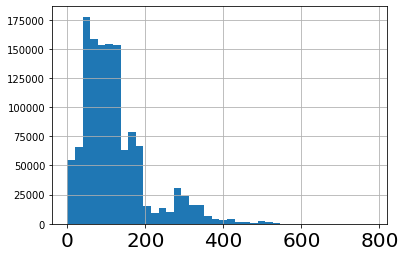

In [ ]:
df['Price'].hist(bins=40)

## Paid 

Goes directly into the modelling

In [ ]:
df['paid'].value_counts()

Y    1075571
N      56686
P        514
Name: paid, dtype: int64

Class_name

In [ ]:
c1 = df[df['isAttended']=='Yes'].groupby('class_name')['isAttended'].count()
c2 = df[df['isAttended']=='No'].groupby('class_name')['isAttended'].count()
c3 = df[df['isAttended'] != '???'].groupby('class_name')['isAttended'].count()
c = pd.concat([c1,c2,c3],axis=1,keys=['Yes','No','Tot'])
c['y_percent']= (c['Yes']/c['Tot'])*100
c['n_percent']= (c['No']/c['Tot'])*100
c = c.reset_index()
c

,class_name,Yes,No,Tot,y_percent,n_percent
0,ACCMAN RELO,63139.0,9356,72495,87.094282,12.905718
1,ACCOUNT MANAGER,77623.0,15893,93516,83.005047,16.994953
2,ADA,1973.0,950,2923,67.499145,32.500855
3,ADA INF,207.0,389,596,34.731544,65.268456
4,BROADCAST,476.0,156,632,75.316456,24.683544
5,COACH,1119.0,393,1512,74.007937,25.992063
6,DDQ-BRDCSTHOLD,2.0,6,8,25.000000,75.000000
7,DIST-DHOLD,64.0,98,162,39.506173,60.493827
8,DIST-OPEN,62319.0,42414,104733,59.502736,40.497264
9,DOQ-BRDCSTHOLD,13041.0,3662,16703,78.075795,21.924205


(array([1., 0., 1., 1., 0., 1., 0., 2., 1., 2., 1., 0., 3., 0., 3., 2., 6.,
        3., 8., 3.]),
 array([ 0.60882801,  5.16405415,  9.7192803 , 14.27450645, 18.8297326 ,
        23.38495874, 27.94018489, 32.49541104, 37.05063719, 41.60586334,
        46.16108948, 50.71631563, 55.27154178, 59.82676793, 64.38199407,
        68.93722022, 73.49244637, 78.04767252, 82.60289867, 87.15812481,
        91.71335096]),
 <a list of 20 Patch objects>)

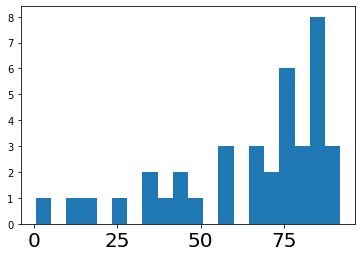

In [ ]:
plt.hist( c['y_percent'], bins=20)

(array([12.,  4.,  1.,  3.,  1.,  1.,  1.,  1.,  1.,  2.]),
 array([1.0000e+00, 1.9270e+02, 3.8440e+02, 5.7610e+02, 7.6780e+02,
        9.5950e+02, 1.1512e+03, 1.3429e+03, 1.5346e+03, 1.7263e+03,
        1.9180e+03]),
 <a list of 10 Patch objects>)

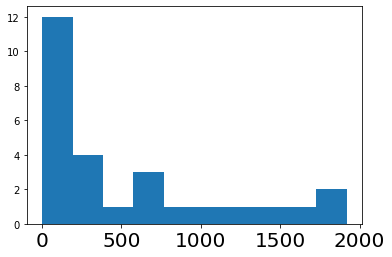

In [ ]:
chk = c[c['Tot']<= 2000]
plt.hist( chk['Tot'], bins=10)

In [ ]:
class_grp1 = list(c[c['Tot']<200]['class_name'].unique())
class_grp2 = list(c[(c['Tot']>=200) & (c['y_percent'] >= 80)]['class_name'].unique())
class_grp3 = list(c[(c['Tot']>=10000) & (c['y_percent'] >= 50) & (c['y_percent'] < 80)]['class_name'].unique())
class_grp4 = list(c[(c['Tot']>=200) & (c['Tot']<10000) & (c['y_percent'] >= 50) & (c['y_percent'] < 80)]['class_name'].unique())
class_grp5 = list(c[(c['Tot']>=200) & (c['y_percent'] <= 50)]['class_name'].unique())
class_grp6 = list(c[c['y_percent'].isnull()]['class_name'].unique())

In [ ]:
df['class_name_grp']=np.nan
df.loc[df['class_name'].isin(class_grp1),'class_name_grp']= 'class_name_1'
df.loc[df['class_name'].isin(class_grp2),'class_name_grp']= 'class_name_2'
df.loc[df['class_name'].isin(class_grp3),'class_name_grp']= 'class_name_3'
df.loc[df['class_name'].isin(class_grp4),'class_name_grp']= 'class_name_4'
df.loc[df['class_name'].isin(class_grp5),'class_name_grp']= 'class_name_5'
df.loc[df['class_name'].isin(class_grp6),'class_name_grp']= 'class_name_6'

if the counts are very less - very unique class names - class_name_1 

Most frequent class - class_name_2 

most common and yet moderate attendance - class_name_3 

not very common and yet moderate attendance - class_name_4 

very less attendance - class_grp_5 

no attendance at all ever - class_name_6

TicketClass

In [ ]:
s1 = df[df['isAttended']=='Yes'].groupby('TicketClass')['isAttended'].count()
s2 = df[df['isAttended']=='No'].groupby('TicketClass')['isAttended'].count()
s3 = df[df['isAttended'] != '???'].groupby('TicketClass')['isAttended'].count()
s = pd.concat([s1,s2,s3],axis=1,keys=['Yes','No','Tot'])
s['y_percent']= (s['Yes']/s['Tot'])*100
s['n_percent']= (s['No']/s['Tot'])*100
s = s.reset_index()
s

,TicketClass,Yes,No,Tot,y_percent,n_percent
0,ADA,10060,3602,13662,73.634900,26.365100
1,Infill,31974,10452,42426,75.364163,24.635837
2,Manifest,857129,214531,1071660,79.981431,20.018569
3,Obstruct,710,5416,6126,11.589944,88.410056
4,Obstructed View,987,5270,6257,15.774333,84.225667
5,SRO,85,18012,18097,0.469691,99.530309


In [ ]:
tkt_class_grp1 = list(s[s['y_percent']>= 70]['TicketClass'].unique())
tkt_class_grp2 = list(s[(s['y_percent'] < 70) & (s['Tot']<10000)]['TicketClass'].unique())
tkt_class_grp3 = list(s[(s['y_percent'] < 70) & (s['Tot']>=10000)]['TicketClass'].unique())

In [ ]:
df['ticket_class_grp']=np.nan
df.loc[df['TicketClass'].isin(tkt_class_grp1),'ticket_class_grp']= 'ticket_class_1'
df.loc[df['TicketClass'].isin(tkt_class_grp2),'ticket_class_grp']= 'ticket_class_2'
df.loc[df['TicketClass'].isin(tkt_class_grp3),'ticket_class_grp']= 'ticket_class_3'

high frequent and attendance - ticket_class_1 lower attendance and lower frequent - ticket_class_2 most commonly low attendance - ticket_class_3

## Ticket Type 

Grouped into 5 categories based on total counts and % Count in Yes and No

In [ ]:
group_0 = ['Renewal', 'New', 'Broker', 'Existing', 'SingleGame', 'Sponsor', 'Group']
group_1 = ['Comp','SingleGm Avail','SRO Avail']
group_2 = ['Obstructed Avail','Other Avail','Season Avail','Group Avail','Internal Use']
group_3 = ['Employee','Opponents','Upgrade','Player','Marketing']
group_4 = ['ADA Avail','FlexPack','Other SOLD','Other','Premium Avail','Held']

def flag_df(dataframe):
    if (dataframe['TicketType'] in group_0):
        return 'group_0'
    elif (dataframe['TicketType'] in group_1):
        return 'group_1'
    elif (dataframe['TicketType'] in group_2):
        return 'group_2'
    elif (dataframe['TicketType'] in group_3):
        return 'group_3'  
    elif (dataframe['TicketType'] in group_4):
        return 'group_4'


df['TicketType_group'] = df.apply(flag_df, axis = 1)       

In [ ]:
df['TicketType_group'].value_counts()

group_0    1132624
group_1     105353
group_2      25851
group_3      20329
group_4       2759
Name: TicketType_group, dtype: int64

In [ ]:
df.shape

(1286916, 46)

In [ ]:
df.to_csv("/content/drive/MyDrive/Crossroads/engg_data/crossroads_data_feature_grouped.csv", index=False)